In [1]:
# load all the libraries at once
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
from datetime import datetime
import scipy as sc
from scipy.stats import norm
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the full dataset
# Download "Google Analytics Revenue Prediction" dataset from "Kaggle"
# Don't use this until you've access to full dataset
#dat = pd.read_csv('D:\\DATA SCIENCE METRO COLLEGE\\PYTHON CLASS\\project\\ga-customer-revenue-prediction\\train_v2.csv')

In [4]:
# dat.shape

In [6]:
# # # Run for once to create a sample of dataset
# # # Create a sample dataset of 5percent size
# fivePercent = int(round(dat.shape[0]*0.05, 1))
# dat_mini = dat.sample(n=fivePercent, replace=False)
# dat_mini.to_csv('ga_mini.csv')
# # If you already have this sample dataset, then dont uncomment this section

In [7]:
# Read the sample dataset (5% of full dataset)
dat = pd.read_csv('ga_mini.csv')

In [9]:
# View the dataset info
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170833 entries, 0 to 170832
Data columns (total 14 columns):
Unnamed: 0              170833 non-null int64
channelGrouping         170833 non-null object
customDimensions        170833 non-null object
date                    170833 non-null int64
device                  170833 non-null object
fullVisitorId           170833 non-null object
geoNetwork              170833 non-null object
hits                    170833 non-null object
socialEngagementType    170833 non-null object
totals                  170833 non-null object
trafficSource           170833 non-null object
visitId                 170833 non-null int64
visitNumber             170833 non-null int64
visitStartTime          170833 non-null int64
dtypes: int64(5), object(9)
memory usage: 18.2+ MB


In [10]:
# Check for null values
dat.isnull().sum()

Unnamed: 0              0
channelGrouping         0
customDimensions        0
date                    0
device                  0
fullVisitorId           0
geoNetwork              0
hits                    0
socialEngagementType    0
totals                  0
trafficSource           0
visitId                 0
visitNumber             0
visitStartTime          0
dtype: int64

# Story Board
1. What are the Prominent Customer Segments by Channel Grouping, Browser Type and Region?
2. Analyze the popularity of browser in different regions?
3. Which browser gets most search type references?
4. Monthly & Annual analysis of customers?
5. Analyze hits, elapsed time and page views?

## Answer 1: Prominent Customer Segments by Channel Grouping, Browser Type & Region.

In [11]:
# Answer 1.1: Prominent Customer Segments by Channel Grouping?
datChannelGroupingRatio = dat.channelGrouping.value_counts()/dat.shape[0]*100
datChannelGroupingRatio

Organic Search    43.485743
Social            20.658187
Direct            16.023836
Referral          12.252317
Display            3.015811
Paid Search        2.676883
Affiliates         1.878443
(Other)            0.008781
Name: channelGrouping, dtype: float64

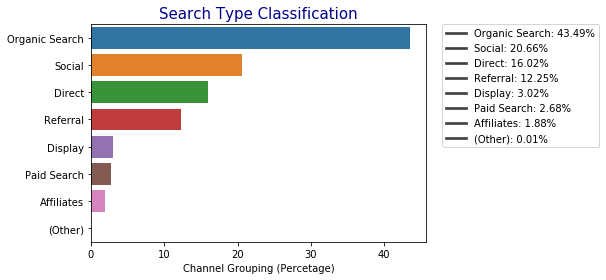

In [12]:
# Answer 1.1: Visualization

# Creating table information
labels = []
for idx, perc in zip(datChannelGroupingRatio.index, datChannelGroupingRatio):
    labels.append(f"{idx}: {round(perc,2)}%")

# Barplot visualization   
sns.barplot(x=datChannelGroupingRatio, y=datChannelGroupingRatio.index)
plt.xlabel('Channel Grouping (Percetage)')
plt.title('Search Type Classification', color='darkblue', fontsize=15)
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [13]:
# Answer 1.2.1: Data Cleaning for (Prominent Customer Segments by Browser?)
dat['browser'] = dat['device']
new1 = [new for new in dat.device.values]
new2 = [json.loads(new)['browser'] for new in new1]
dat['browser'] = new2

# new = dat.browser.apply(eval)
# new = {row["browser"] for row in new}
# print (new)

In [14]:
# Answer 1.2.2: Prepare data for visualaize Prominent Customer Segments by Browser?

# Browser Popularity Percentage: 100*(Per Browser Count / Total Count) 
datBrowserRatio = dat.browser.value_counts()/dat.shape[0]*100

# List the Well-known browsers
known_browsers = ['Chrome', 'Safari', 'Firefox', 'Internet Explorer', 'Android Webview',
       'Edge', 'Samsung Internet', 'Opera Mini', 'Safari (in-app)', 'Opera',
       'UC Browser', 'YaBrowser', 'Amazon Silk', 'Coc Coc', 'Android Browser',
       'Mozilla Compatible Agent', 'Maxthon', 'Puffin', 'MRCHROME',
       'Nintendo Browser', 'BlackBerry', 'Nokia Browser', 'Iron',
       'LYF_LS_4002_12', 'Mozilla', 'SeaMonkey', '(not set)', 'Lunascape',
       'User Agent', 'jscatcher','Apple-iPhone7C2', '+Simple Browser', 
       'osee2unifiedRelease', 'Browser','Seznam']

# Extract the index of Brower Popularity Data, and Convert it to List Type 
new_index = list(datBrowserRatio.index)

# Convert all unknown or non-popular browser names to "other"
id_num = 0
for idx in list(datBrowserRatio.index):
    if idx not in known_browsers:
        new_index[id_num]='other'
    id_num+=1    

# Update the index of data.frame
new_index_df = pd.DataFrame({'Browser': new_index, 'Percentage': datBrowserRatio})

# Apply Groupby to Calculate Browser vs Percentage sum, to summarize the "other" category
new_browser_viz = new_index_df.groupby('Browser')['Percentage'].sum()

# Display data in ascending order
new_browser_viz.sort_values(ascending=False)

Browser
Chrome                      68.677597
Safari                      18.151645
Firefox                      3.763324
Internet Explorer            2.105565
Android Webview              2.052882
Edge                         1.228100
Samsung Internet             0.927807
Opera Mini                   0.860489
Safari (in-app)              0.817172
Opera                        0.584196
UC Browser                   0.306147
YaBrowser                    0.183805
Amazon Silk                  0.079610
Coc Coc                      0.070244
Android Browser              0.053854
Mozilla Compatible Agent     0.038634
Maxthon                      0.023415
Puffin                       0.014634
MRCHROME                     0.014049
Nintendo Browser             0.011707
BlackBerry                   0.011707
Nokia Browser                0.004683
Iron                         0.004098
other                        0.003512
LYF_LS_4002_12               0.001756
Mozilla                      0.001756
Luna

In [16]:
# Answer 1.3.1: Data Cleaning (For data segmentation by Region?)

# Extract the raw column
dat['region'] = dat['geoNetwork']

# Extract list of dictionary type objects from raw column
new1 = [new for new in dat.geoNetwork.values]

# Convert dictionary type string objects to dictionary, 
#        and save to new list "new2", 
#        and extract
new2 = [json.loads(new)['continent'] for new in new1]

# Create a new column "region" with list "new2"
dat['region'] = new2

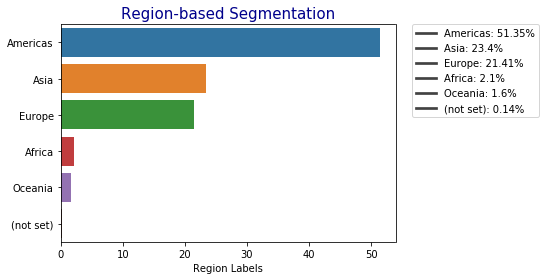

In [17]:
# Answer 1.3.2: Visualaize Prominent Region-based Customer Segments?

# Extract the Region Popularity Percentage: 100(Region value counts / Total counts)
datRegionRatio = dat.region.value_counts()/dat.shape[0]*100

# Creating Legend Table Information
labels = []
for idx, perc in zip(datRegionRatio.index, datRegionRatio):
    labels.append(f"{idx}: {round(perc,2)}%")

# Visualize the Region Popularity Frequency Table using Seaborn & Matplotlib
sns.barplot(x=datRegionRatio, y=datRegionRatio.index)
plt.xlabel('Region Labels')
plt.title('Region-based Segmentation', color='darkblue', fontsize=15)
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Answer 2
### 2. Analyze the popularity of browser in different regions?
### Top 10 Browsers

In [18]:
# Answer 2.1

# Extract the data for Top 10 browsers
dat_mini = dat.loc[dat.browser.isin(list(datBrowserRatio.index[:10]))]

# Add a new column with value 1, to ease out the value count
dat_mini['value'] = 1

# Extract the pivot table based upon Region/Browser as Frequency Distribution.
regionBrowserRelation = pd.pivot_table(dat_mini, index=['region'], columns=['browser'], values=["value"], aggfunc=np.sum)
regionBrowserRelation

value                                                    \
browser   Android Webview   Chrome    Edge Firefox Internet Explorer  Opera   
region                                                                        
(not set)             6.0    140.0     NaN    13.0              25.0    5.0   
Africa              835.0   1455.0    12.0   168.0              32.0   32.0   
Americas            969.0  64041.0  1074.0  2117.0            1538.0  279.0   
Asia               1299.0  26107.0   350.0  1465.0             876.0  235.0   
Europe              383.0  23788.0   619.0  2574.0            1045.0  427.0   
Oceania              15.0   1793.0    43.0    92.0              81.0   20.0   

                                                                
browser   Opera Mini   Safari Safari (in-app) Samsung Internet  
region                                                          
(not set)       22.0     23.0             3.0              5.0  
Africa         665.0    309.0            11.0             35.0  
Americas        47.0  15628.0           837.0            953.0  
Asia           692.0   7624.0           241.0            329.0  
Europe          44.0   6777.0           285.0            249.0  
Oceania          NaN    648.0            19.0             14.0

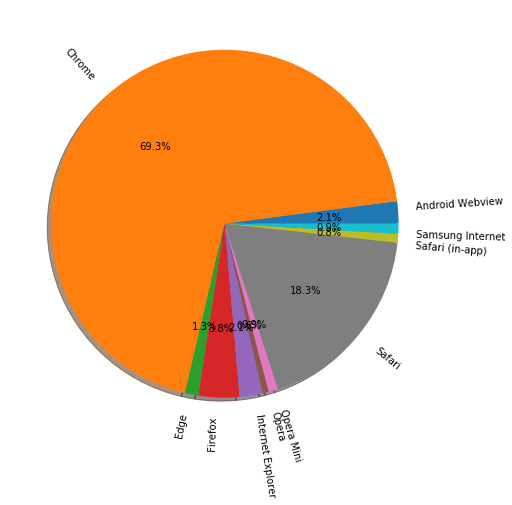

In [60]:
# Answer 2.2

# Overall Percentage Function
def overallPercentage(inMat):
    cMat = inMat.copy()
    tSumArr = cMat.sum()
    tSum = sum(tSumArr)
    cMat = round((cMat/tSum)*100,2)
    return cMat

# Run the function to compute the percentage 
output2 = overallPercentage(regionBrowserRelation)

# Clean the index and row names
output2 = output2.rename(index = {'(not set)': 'Unknown'})
colnames = [name for emp, name in list(output2.columns)]
output2.columns = colnames

# Compute the Sum of Percentages For all Regions to Make Frequency Table of Browsers
# This eliminates the "region" element/axis from data, and converts 2-d data to 1-d data grouped by "Browser Popularity"
reg2 = output2.sum()
reg2.plot(kind='pie', figsize=(12, 8), rotatelabels =True, autopct='%1.1f%%', shadow=True)
#plt.suptitle('Browser Popularity Analysis');
plt.ylabel('')
plt.show()

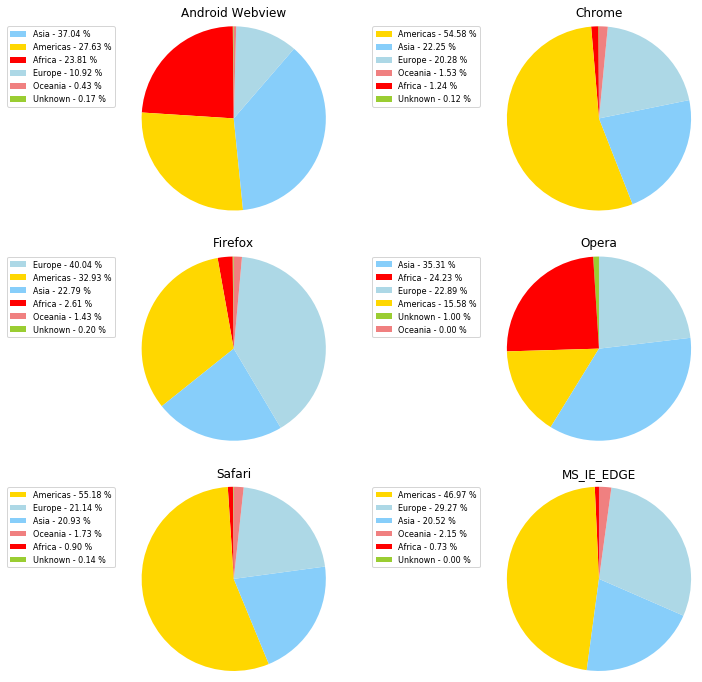

In [109]:
# Answer 2.3

# Version 2: Grouped the browser variants together to shorten the selection of graphs
def columnPercentage(inMat):
    cMat = inMat.copy()
    tSum = cMat.sum()
    cMat = round((cMat/tSum)*100,2)
    return cMat

# Run the function to compute the percentage 
output = columnPercentage(regionBrowserRelation)
# Clean the index and row names
output = output.rename(index = {'(not set)': 'Unknown'})
colnames = [name for emp, name in list(output.columns)]
output.columns = colnames


#print (output.columns)
output['MS_IE_EDGE'] = (output['Edge'] + output['Internet Explorer'])/2
output['Safari'] = (output['Safari']+output['Safari (in-app)'])/2
output['Opera'] = (output['Opera'] + output['Opera Mini'])/2
output = output.drop(['Internet Explorer','Edge','Opera Mini', 'Safari (in-app)','Samsung Internet'], axis=1)
output.fillna(0)


def plotAPie(output_mini):
    colors = ['yellowgreen','red','gold','lightskyblue','lightblue','lightcoral','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
    patches, texts = plt.pie(output_mini, colors=colors, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(output_mini.index, output_mini)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, output_mini),
                                              key=lambda x: x[2],
                                              reverse=True))

    plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)

#print (output.columns)

plt.figure(figsize=(12,12))
cols =  ['Android Webview', 'Chrome', 'Firefox', 'Opera', 'Safari','MS_IE_EDGE']
for ix in range(len(cols)):
    colsToExtract = cols[ix]
    output_mini = output.loc[:,colsToExtract]
    output_mini = output_mini.fillna(0)
    plt.subplot(3, 2, ix+1)
    plt.title(cols[ix])
    plotAPie(output_mini)    

# colsToExtract = 'Safari'
# output_mini = output.loc[:,colsToExtract]
# output_mini = output_mini.fillna(0)
# plt.figure(figsize=(6,4))
# plt.subplot(232)
# plotAPie(output_mini)    
#output.plot.pie(subplots=True, figsize=(16, 30),layout=(2,3),legend=False) 
plt.show()

# Answer 3
### 3. Which browser gets most search type references?

In [58]:
# Extract Regional & Channel Grouping Dataset, counted by rows ("Value")
# Grouped By: Region & ChannelGrouping
# Counted By: Value
searchRegion = pd.pivot_table(dat_mini, index=['region'], columns=['channelGrouping'], values=["value"], aggfunc=np.sum)

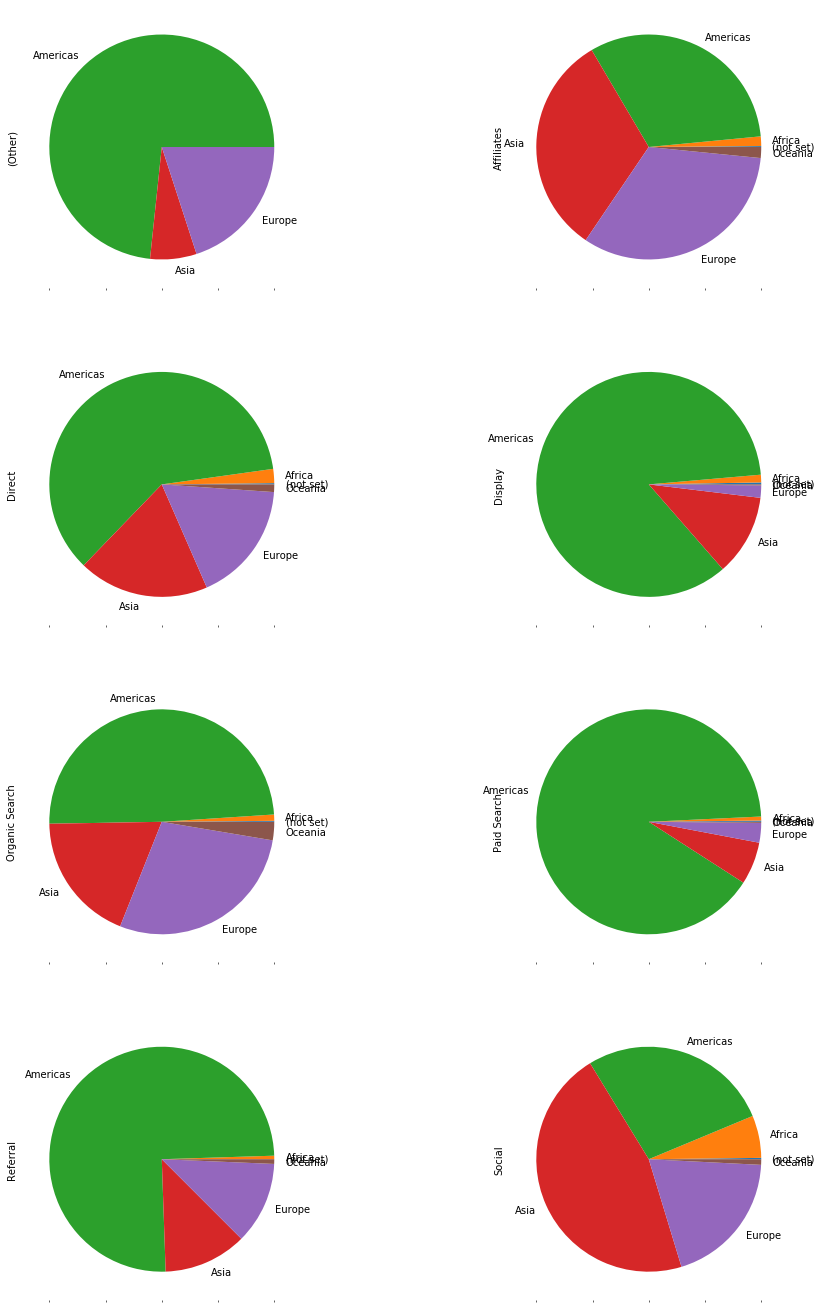

In [59]:
# Answer 3.1

# Compute Column Percentage, where each Column Total equals 100, 
# and each component represents the Proportion (Percentage) value in that Column
def columnPercentage(inMat):
    cMat = inMat.copy()
    tSum = cMat.sum()
    cMat = round((cMat/tSum)*100,2)
    return cMat

# Run the function to compute the percentage 
output = columnPercentage(searchRegion)

# Clean the index and row names
output = output.rename(index = {'(Other)': 'Unknown'})
colnames = [name for emp, name in list(output.columns)]
output.columns = colnames

# Visualize Region vs Search Type Analytics
output.plot.pie(subplots=True, figsize=(16, 30),layout=(5,2),legend=False) 
plt.show()

# Answer 4: Monthly & Annual Analysis of Customers

In [27]:
# I'm curious to check the effect of months with long weekends, and othe holidays

In [28]:
# Answer 4.1.1: Firstly, lets separte year, month and day and convert to numeric
dat['year']=[int(str(date)[:4]) for date in dat['date']]
dat['month']=[int(str(date)[4:6]) for date in dat['date']]
dat['day']=[int(str(date)[6:]) for date in dat['date']]
dat['value']=1

In [29]:
# Answer 4.1.2: Groupby ['year','month'] and count group size (Month-Year Analysis)
monthYearAnalysis = dat.groupby(['year','month'])['value'].count()

In [30]:
# Answer 4.1.3: Re-build index for monthYearAnalysis
reb_index = []
for values in monthYearAnalysis.index:
    y, m = values
    if m < 10:
        date_label = f"{y}-0{m}"
    else:
        date_label = f"{y}-{m}"
    reb_index.append(date_label)
monthYearAnalysis.index = reb_index   

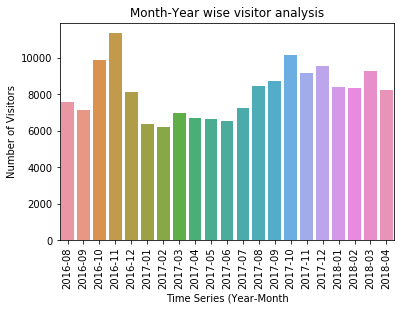

In [52]:
# Answer 4.1.4: Visualize Month-Year Analysis
chart = sns.barplot(x=monthYearAnalysis.index, y=monthYearAnalysis)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel('Time Series (Year-Month')
plt.ylabel('Number of Visitors')
plt.title('Month-Year wise visitor analysis')
plt.show()

In [32]:
# 4.2.1: Day-wise Analysis
# Rebuild dates to find the day of weeks,
# And save day of week to new column
reb_dates = []
for y,m,d in zip(dat['year'],dat['month'],dat['day']):
    if m < 10:
        m_label = f"0{m}"
    else:
        m_label = f"{m}"
    if d < 10:
        d_label = f"0{d}"
    else:
        d_label = f"{d}"
    date_label = f"{y}-{m_label}-{d_label}"    
    date_label_asDate = datetime.strptime(date_label, '%Y-%m-%d')
    reb_dates.append(date_label_asDate)

s = pd.Series(reb_dates)
dat['date_corrected']=s

In [33]:
# 4.2.2: Create new column DayOfWeek from date_corrected column
dayOfWeek = s.dt.dayofweek
dat['dayOfWeek']=dayOfWeek

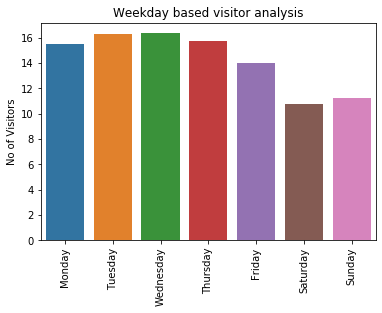

In [49]:
# 4.2.3: Groupby & Visualize DayOfWeek wise Analysis
dayOfWeek_Analysis = dat.groupby(['dayOfWeek'])['value'].count()
dayOfWeek_Analysis_p = (dayOfWeek_Analysis/sum(dayOfWeek_Analysis))*100
dayOfWeek_Labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
chart = sns.barplot(x=dayOfWeek_Labels, y=dayOfWeek_Analysis_p)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Weekday based visitor analysis')
plt.ylabel('No of Visitors')
plt.show()

# Answer 5: Analyze Visits and Elapsed Time?

Text(0, 0.5, 'Frequency')

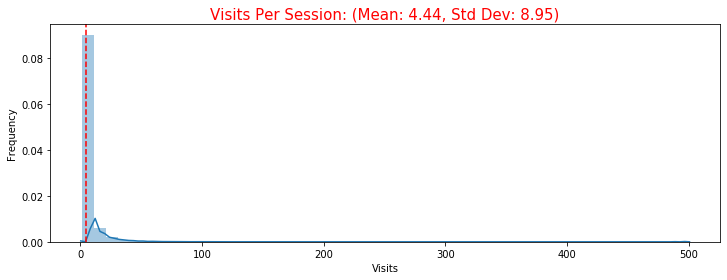

In [46]:
# Answer 5.1.1: Elapsed time Analysis (Analyze Visits)
visits = [int(json.loads(new)['hits']) for new in dat['totals']]

plt.figure(figsize=(12,4))
sns.distplot(visits)
plt.axvline(np.mean(visits), color='red', linestyle='--')
title_custom = f"Visits Per Session: (Mean: {round(np.mean(visits),2)}, Std Dev: {round(np.std(visits),2)})"
plt.title(title_custom, color='red', fontsize=15)
plt.xlabel('Visits')
plt.ylabel('Frequency')


254.04477862522185


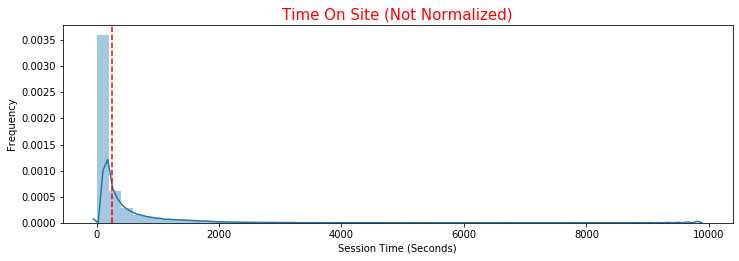

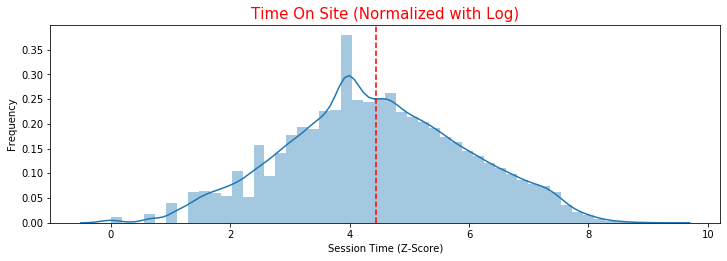

In [110]:
def timeOnSiteBool(dict):
    if 'timeOnSite' in dict:
        return int(dict['timeOnSite'])
    else: 
        return 0
timeOnSite = [timeOnSiteBool(json.loads(new)) for new in dat['totals']]
t = [val for val in timeOnSite if val > 0]
#print (f"Before: {len(timeOnSite)}, After: {len(t)}")
plt.figure(figsize=(12,8))
plt.subplot(211)
sns.distplot(t)
plt.axvline(np.mean(t), color='red', linestyle='--')
plt.title('Time On Site (Not Normalized)', color='red', fontsize=15)
plt.xlabel('Session Time (Seconds)')
plt.ylabel('Frequency')
plt.figure(figsize=(12,8))
plt.subplot(212)
sns.distplot(np.log(t))
plt.axvline(np.mean(np.log(t)), color='red', linestyle='--')
plt.title('Time On Site (Normalized with Log)', color='red', fontsize=15)
plt.xlabel('Session Time (Z-Score)')
plt.ylabel('Frequency')

plt.show()

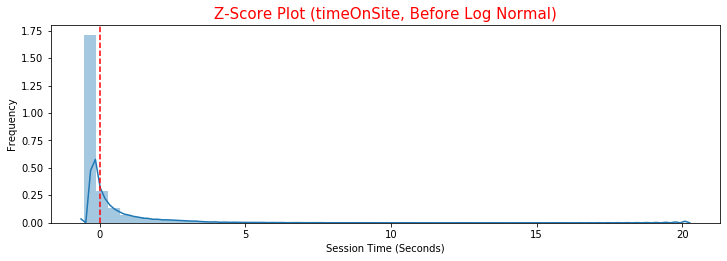

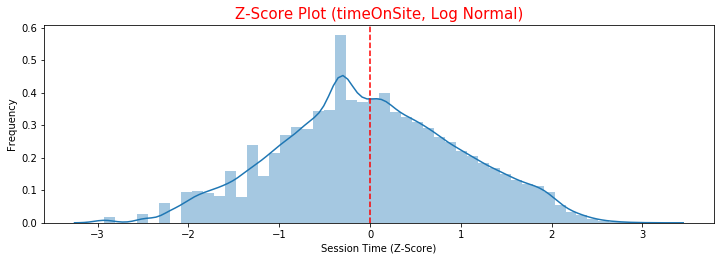

In [48]:
t_zScore = sc.stats.zscore(t)
t_zScoreNorm = sc.stats.zscore(np.log(t))

plt.figure(figsize=(12,8))
plt.subplot(211)
sns.distplot(t_zScore)
plt.axvline(np.mean(t_zScore), color='red', linestyle='--')
plt.title('Z-Score Plot (timeOnSite, Before Log Normal)', color='red', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Session Time (Seconds)')
plt.show()
plt.figure(figsize=(12,8))
plt.subplot(212)
sns.distplot(t_zScoreNorm)
plt.axvline(np.mean(t_zScoreNorm), color='red', linestyle='--')
plt.title('Z-Score Plot (timeOnSite, Log Normal)', color='red', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Session Time (Z-Score)')
plt.show()